<a href="https://colab.research.google.com/github/tomblue01/UTAI/blob/main/s2_AIML_ML_Project_full_code_notebook_tjb_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
import os
import warnings

# Suppress Python warnings (like fuzzywuzzy/Levenshtein)
warnings.filterwarnings("ignore")

In [2]:
os.system('pip install -q pip==23.2.1')
os.system('pip install -q "sqlalchemy>=1.4.1,<2.0.0"')
os.system('pip install -q sqlalchemy-mate==1.4.28.3')
os.system('pip install -q python-Levenshtein')
os.system('pip install -q uszipcode')


0

In [3]:
# Setup uszipcode for use

from uszipcode import SearchEngine

# Initialize the search engine (default mode)
search = SearchEngine()

# Try a test lookup
zipcode_info = search.by_zipcode("63101")
print(zipcode_info.major_city, zipcode_info.state, zipcode_info.median_household_income)



Saint Louis MO 54417


In [5]:
os.system('pip install --upgrade pip')  # To get back to latest pip

0

In [7]:
# Installing the libraries with the specified version.

os.system('pip install numpy==1.25.2')
os.system('pip install pandas==1.5.3')
os.system('pip install matplotlib==3.7.1')
os.system('pip install seaborn==0.13.1')
os.system('pip install scikit-learn==1.2.2')
os.system('pip install sklearn-pandas==2.2.0 -q --user')

0

In [8]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [9]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/AIUT/Course work/Semester 2/Project/Loan_Modelling.csv')

# Ensure the data loaded
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
# Make a copy of data
df = data.copy()

# validate the copy worked
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

### Check Dataset Structure

In [12]:
# Check number of rows and columns
num_rows, num_cols = df.shape
print(f"The dataset contains {num_rows} rows and {num_cols} columns.")



The dataset contains 5000 rows and 14 columns.


In [13]:
# Display column data types and missing values
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations**
* All datatypes are numeric
* no missing data in any of the columns

In [14]:
# Display the first few rows
print("\nFirst 5 rows of the dataset:")
display(df.head())

print()

# Display the last few rows
print("\nLast 5 rows of the dataset:")
display(df.tail())



First 5 rows of the dataset:


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1




Last 5 rows of the dataset:


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Check for Duplicates

In [15]:
# Count duplicate rows
num_duplicates = df.duplicated().sum()
print(f"There are {num_duplicates} duplicate rows in the dataset.")

# Display duplicate rows if any exist
if num_duplicates > 0:
    print("\nSample duplicate rows:")
    display(df[df.duplicated()].head())
else:
    print("No duplicate rows found.")


There are 0 duplicate rows in the dataset.
No duplicate rows found.


### Check for Missing Values and Display

In [16]:
# Count missing values per column
missing_values = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

# Combine counts and percentages into a readable format
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_df = missing_df[missing_df["Missing Values"] > 0]  # Filter only columns with missing values

if missing_df.empty:
    print("No missing values detected in the dataset.")
else:
    print("Columns with missing values:")
    display(missing_df)


No missing values detected in the dataset.


### Check for Inconsistencies

In [17]:
# Check if Experience is greater than Age
invalid_experience = df[df["Experience"] > df["Age"]]
if not invalid_experience.empty:
    print(f"Found {len(invalid_experience)} cases where Experience is greater than Age.")
    display(invalid_experience)
else:
    print("No inconsistencies found where Experience is greater than Age.")

# Check for invalid ZIP Code lengths (not 5 digits)
invalid_zip = df[df["ZIPCode"].astype(str).str.len() != 5]
if not invalid_zip.empty:
    print(f"Found {len(invalid_zip)} invalid ZIP codes (not 5 digits).")
    display(invalid_zip)
else:
    print("All ZIP codes appear to have valid lengths.")


No inconsistencies found where Experience is greater than Age.
All ZIP codes appear to have valid lengths.


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

#### Check Basic Statistics

In [18]:
# Summary statistics excluding irrelevant fields, rounded to 2 decimal places
print("Summary statistics for numerical features (excluding 'ID' and 'ZIPCode'):")
display(df.drop(columns=["ID", "ZIPCode", "Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]).describe().apply(lambda s: s.apply(lambda x: format(x, '.2f'))))


# No category objects exist, can skip this
# Summary statistics for categorical columns
# print("\nSummary statistics for categorical features:")
# display(df.describe(include='object'))

# Unique values per column
print("\nNumber of unique values per column:")
unique_counts = df.nunique()
for col, count in unique_counts.items():
    print(f" - {col}: {count} unique values")


Summary statistics for numerical features (excluding 'ID' and 'ZIPCode'):


,Age,Experience,Income,Family,CCAvg,Mortgage
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,45.34,20.10,73.77,2.40,1.94,56.50
std,11.46,11.47,46.03,1.15,1.75,101.71
min,23.00,-3.00,8.00,1.00,0.00,0.00
25%,35.00,10.00,39.00,1.00,0.70,0.00
50%,45.00,20.00,64.00,2.00,1.50,0.00
75%,55.00,30.00,98.00,3.00,2.50,101.00
max,67.00,43.00,224.00,4.00,10.00,635.00



Number of unique values per column:
 - ID: 5000 unique values
 - Age: 45 unique values
 - Experience: 47 unique values
 - Income: 162 unique values
 - ZIPCode: 467 unique values
 - Family: 4 unique values
 - CCAvg: 108 unique values
 - Education: 3 unique values
 - Mortgage: 347 unique values
 - Personal_Loan: 2 unique values
 - Securities_Account: 2 unique values
 - CD_Account: 2 unique values
 - Online: 2 unique values
 - CreditCard: 2 unique values


**Observations**

 * ID has 5,000 unique values, meaning they are unique throughout the dataset and can be used as a unique identifier

* There is experience with a min value of -3.00; its impossible to have negative experience; this requires more exploration

#### Review Distributions, Median and Outliers

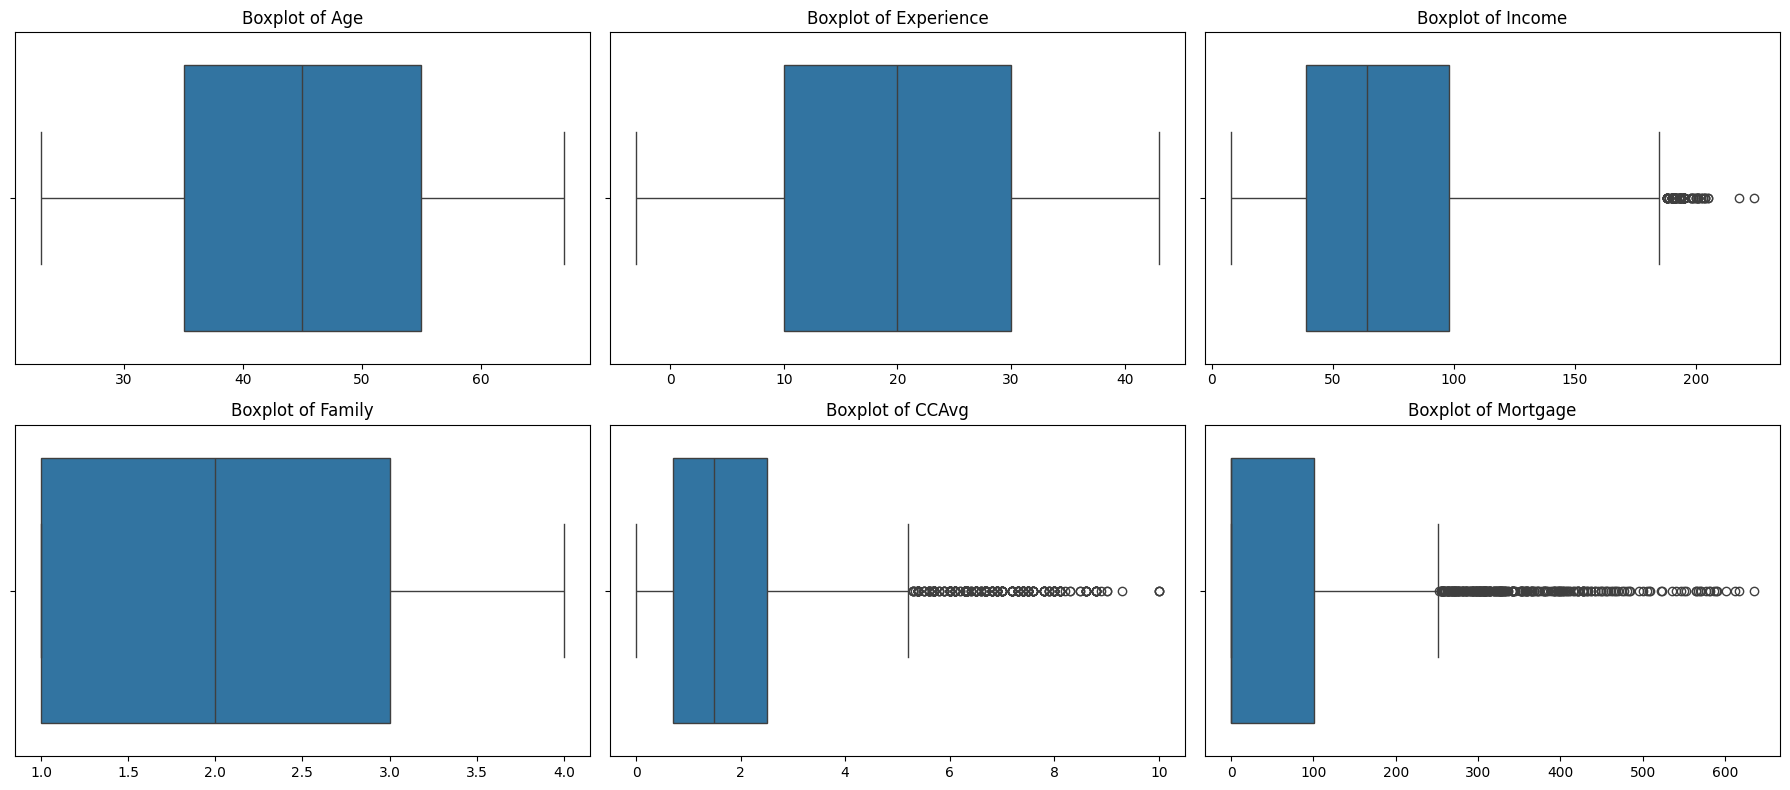

In [19]:
# List of features to plot
features = ["Age", "Experience", "Income", "Family", "CCAvg", "Mortgage"]

# Set up a 2x3 grid for 6 boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()  # Flatten to easily index

# Create each boxplot
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")
    axes[i].set_xlabel("")  # Optional: remove x-axis label for a cleaner look

# Adjust layout
plt.tight_layout()
plt.show()


**Observations**

* Income, CCAvg and Mortage has a lot of outliers.

* Age and Experience are the only two features that are not right skewed

#### **Question 1**

What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

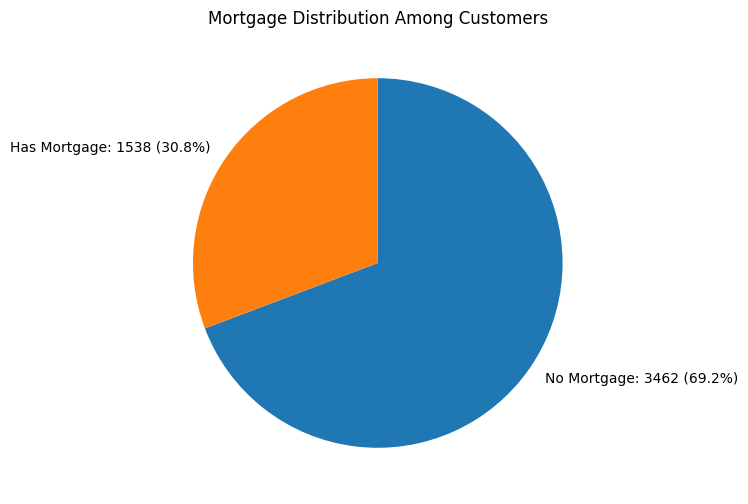

In [67]:
# Count how many customers have and don't have a mortgage
mortgage_counts = df["Mortgage"].apply(lambda x: "Has Mortgage" if x > 0 else "No Mortgage").value_counts()

# Format labels with both count and percentage
labels = [f"{label}: {count} ({count / mortgage_counts.sum():.1%})" for label, count in mortgage_counts.items()]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(mortgage_counts, labels=labels, autopct='', startangle=90, counterclock=False)
plt.title("Mortgage Distribution Among Customers")
plt.show()


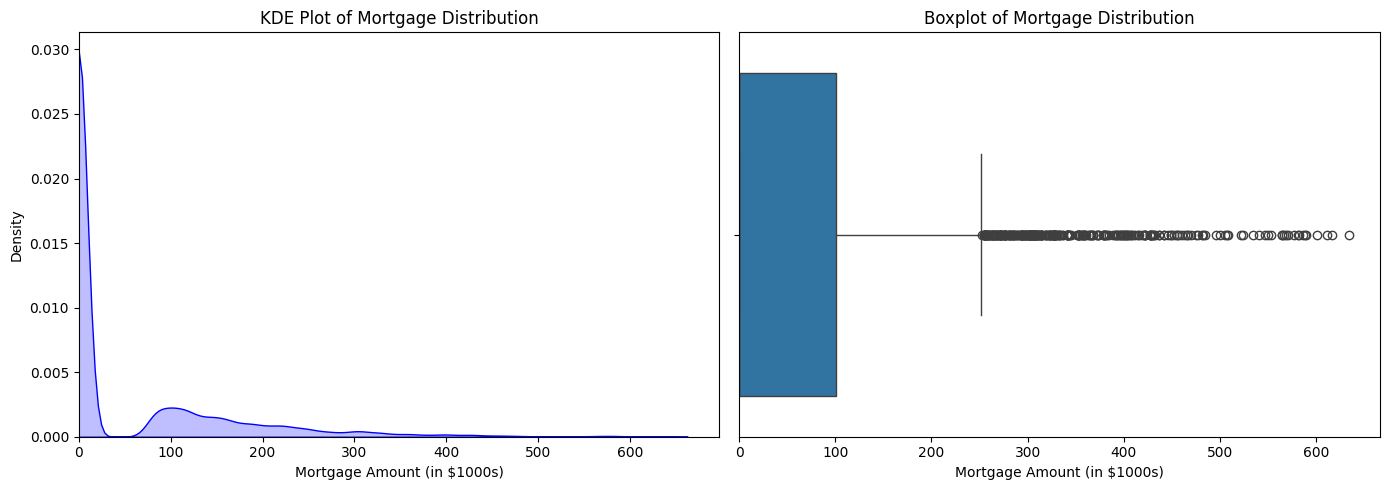

In [20]:
# Set up figure with two subplots (KDE plot & Boxplot)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# KDE Plot
sns.kdeplot(df["Mortgage"], fill=True, color="blue", bw_adjust=0.5, ax=axes[0])
axes[0].set_xlim(0, None)  # Ensure x-axis starts at 0
axes[0].set_xlabel("Mortgage Amount (in $1000s)")
axes[0].set_ylabel("Density")
axes[0].set_title("KDE Plot of Mortgage Distribution")

# Boxplot
sns.boxplot(x=df["Mortgage"], ax=axes[1])
axes[1].set_xlim(0, None)  # Keep consistency with KDE plot
axes[1].set_xlabel("Mortgage Amount (in $1000s)")
axes[1].set_title("Boxplot of Mortgage Distribution")

# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [21]:
# Sanity check - what is the smallest mortgage amount?

min_mortgage = df["Mortgage"].min()
print(f"The smallest mortgage amount in the dataset is: {min_mortgage}")


The smallest mortgage amount in the dataset is: 0


**Answer / Observations**

* By far, the majority of customers have no mortgage. This is probably due to the fact most of them rent, or perhaps a few have their mortages paid off.
* The interquartile range (IQR) (box portion)is concentrated in the lower mortgage values.
* The median is close to zero, meaning more than half of the customers have very low or no mortgage at all.
* The whiskers extend moderately, showing some customers with mid-range mortgage amounts.
* There is a significant number of extreme outliers beyond the upper whisker, with many mortgages extending well beyond 300K, reaching values above 600K.
* These high mortgage values project a long right tail (right-skewed distribution).
* There is a sharp contrast between customers with low/no mortgages and those with very high mortgages.

#### **Question 2**
How many customers have credit cards?

In [22]:
# Count unique customers who have either a positive CCAvg or a CreditCard
num_customers_with_credit = df.loc[(df["CCAvg"] > 0) | (df["CreditCard"] > 0), "ID"].nunique()

print(f"Number of unique customers with a credit card or credit card spending: {num_customers_with_credit}")


Number of unique customers with a credit card or credit card spending: 4922


In [23]:
# Filter rows where CreditCard or CCAvg are non-positive (<= 0)
non_positive_df = df[(df["CreditCard"] <= 0) | (df["CCAvg"] <= 0)]

# Check if any of those rows have non-zero, non-positive values (i.e., < 0)
has_negative_values = (non_positive_df["CreditCard"] < 0) | (non_positive_df["CCAvg"] < 0)

# Count how many rows have negative (but not zero) values
num_negative_non_positive = has_negative_values.sum()

# Output result
print(f"Number of rows with non-zero, non-positive values in CreditCard or CCAvg: {num_negative_non_positive}")

# Show the actual rows if any exist
if num_negative_non_positive > 0:
    display(non_positive_df[has_negative_values])
else:
    print("All non-positive values are zero — no negative values found.")


Number of rows with non-zero, non-positive values in CreditCard or CCAvg: 0
All non-positive values are zero — no negative values found.


**Observations**

* 4,922 of 5,000 have credit cards.

* Of the records where there are no credit cards or credit card spending, all the fields are zero. There appears to be no integrity issues with the data as there are no non-zero, non-positive numbers present in these records.

### Bivariate Analysis


#### **Question 3**

What are the attributes that have a strong correlation with the target attribute (personal loan)?

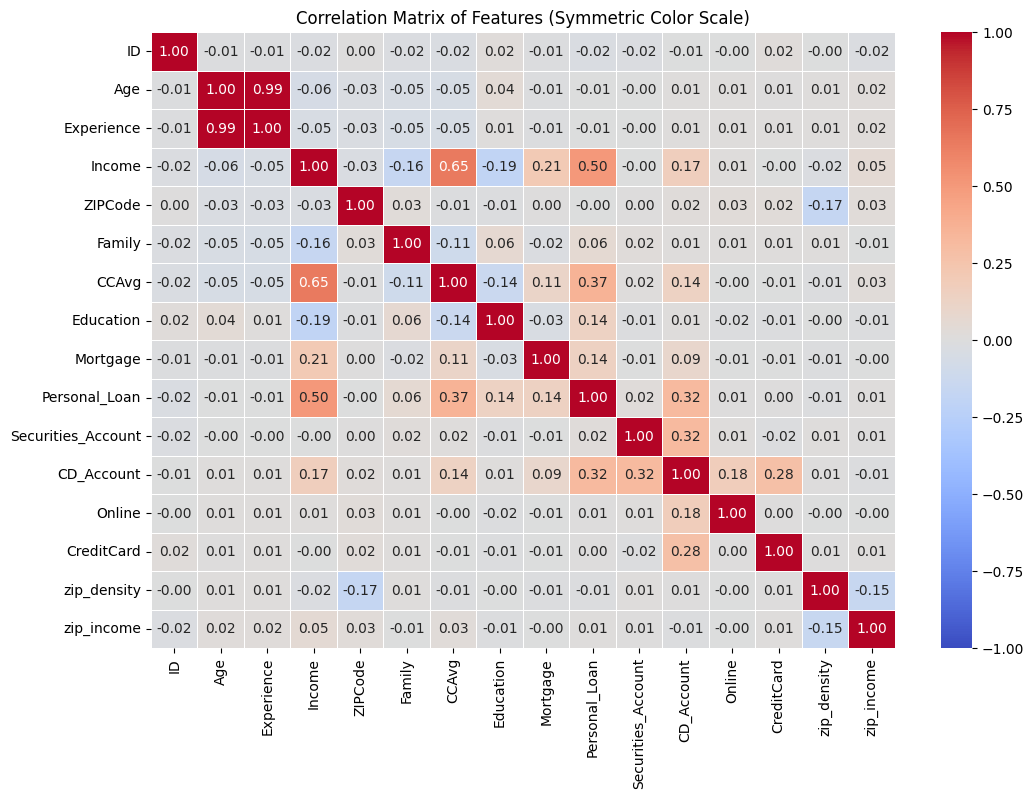

In [35]:
# Correlation heatmap of all numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    vmin=-1,   # Set minimum value of color scale
    vmax=1     # Set maximum value of color scale
)
plt.title("Correlation Matrix of Features (Symmetric Color Scale)")
plt.show()


**Observations**

| Feature              | Correlation (r) | Observation                                                                 |
|----------------------|------------------|---------------------------------------------------------------------------------|
| **Income**           | **0.50**         | Very strong: Higher income is associated with a higher likelihood of accepting a personal loan. |
| **CCAvg**            | **0.37**         | Strong: Higher average monthly credit card spending correlates with loan acceptance. |
| **CD_Account**       | **0.32**         | Moderate: Customers with certificates of deposit are more likely to accept a loan. |
| **Securities_Account** | **0.32**       | Moderate: Customers with investment accounts are more likely to accept a loan. |
| **Education**        | **0.14**         | Weak-to-moderate: Higher education level slightly increases loan uptake.        |
| **Mortgage**         | **0.14**         | Weak: Having a mortgage is weakly associated with accepting a loan.             |




#### **Question 4**

How does a customer's interest in purchasing a loan vary with their age?

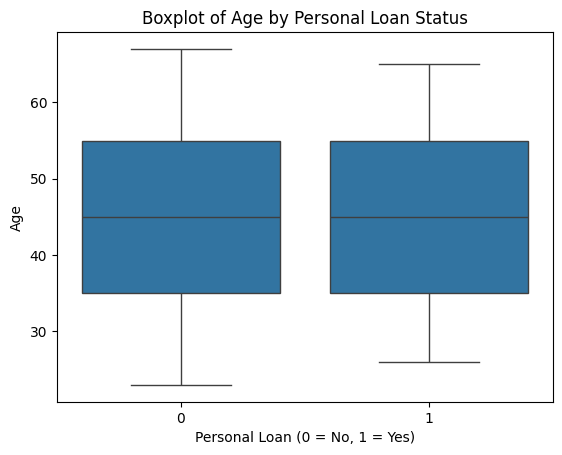

In [37]:
# Boxplot comparing age distributions for loan vs. no-loan customers
sns.boxplot(x='Personal_Loan', y='Age', data=df)
plt.title("Boxplot of Age by Personal Loan Status")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

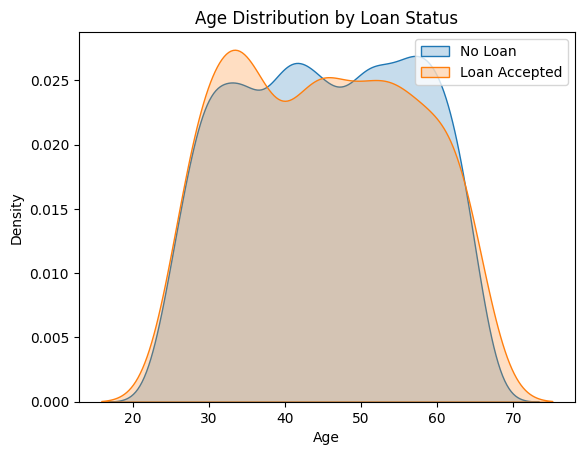

In [38]:
# KDE plot showing age distribution split by loan status
sns.kdeplot(data=df[df['Personal_Loan'] == 0]['Age'], label='No Loan', shade=True)
sns.kdeplot(data=df[df['Personal_Loan'] == 1]['Age'], label='Loan Accepted', shade=True)
plt.title("Age Distribution by Loan Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


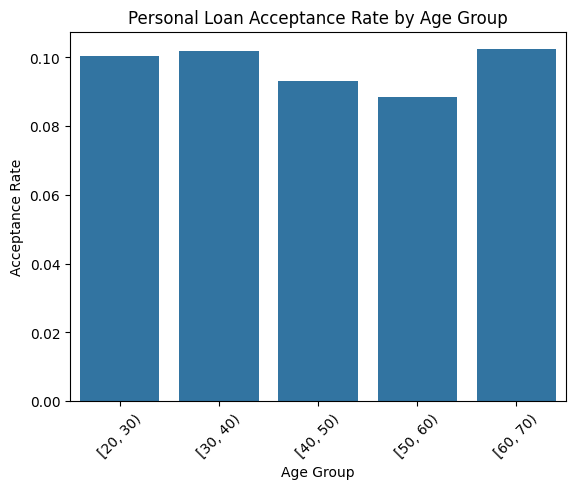

In [39]:
# Create age bins and calculate acceptance rate per bin
df['age_bin'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70], right=False)
age_loan_rate = df.groupby('age_bin', observed=True)['Personal_Loan'].mean().reset_index()

# Barplot
sns.barplot(x='age_bin', y='Personal_Loan', data=age_loan_rate)
plt.title("Personal Loan Acceptance Rate by Age Group")
plt.ylabel("Acceptance Rate")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()


**Answer / Observations**

* The median age of both groups (loan accepted and not accepted) appears nearly identical — hovering in the mid-40s.

* The IQRs (interquartile ranges) are also very similar, suggesting that age spread is consistent regardless of loan acceptance.

* The maximum age is slightly lower for loan takers, possibly implying older individuals are marginally less inclined to take loans.

* There is no significant difference in age distribution between those who accepted and declined loans.

* There are subtle peaks: the "Loan Accepted" group has a slightly higher density around the early 30s and late 60s, suggesting a slight uptick in those ranges.

* Acceptance rates are very stable across age groups, generally in the 9% - 10% range.

* While acceptance rates are relatively consistent, there's a slight uptick among younger (30s) and older (60s) customers. This could suggest financial needs or flexibility motivations specific to those life stages (e.g., young families or retirement planning).

#### **Question 5**

How does a customer's interest in purchasing a loan vary with their education?

In [49]:
# Map numeric education levels to descriptive labels
df["Education_Label"] = df["Education"].map({
    1: "Undergraduate",
    2: "Graduate",
    3: "Advanced/Professional"
})


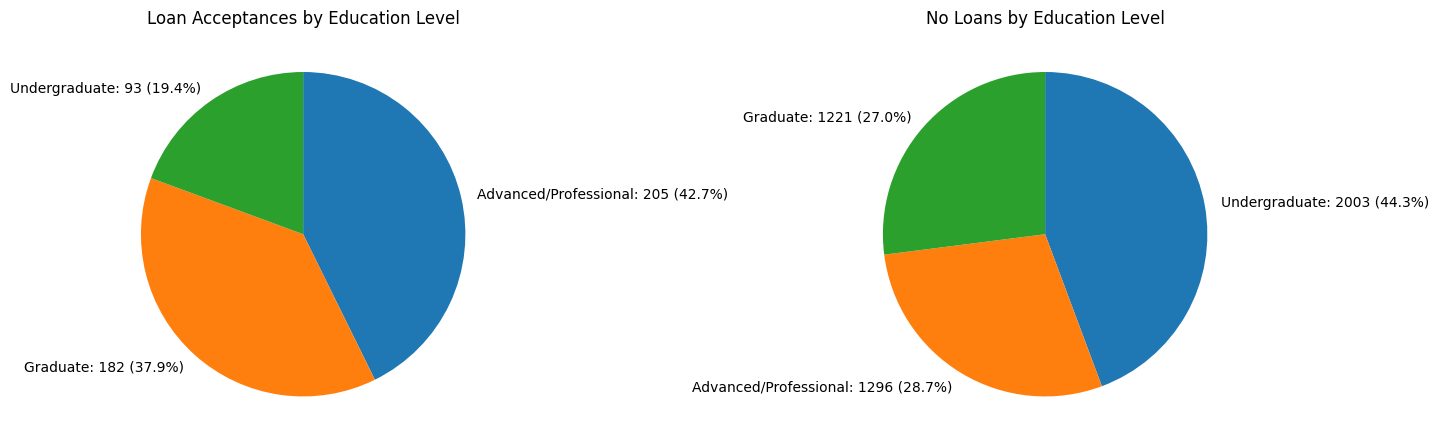

In [64]:
# Prepare data
accepted_loans = df[df["Personal_Loan"] == 1]
no_loans = df[df["Personal_Loan"] == 0]

loan_acceptance_counts = accepted_loans["Education_Label"].value_counts()
no_loans_counts = no_loans["Education_Label"].value_counts()

# Define a function to show both % and absolute count
def format_pie_labels(values):
    total = sum(values)
    return [f'{v} ({v/total:.1%})' for v in values]

# Plot side-by-side pies
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # wider to accommodate labels

# Pie chart for loan acceptances
axes[0].pie(loan_acceptance_counts,
            labels=[f"{label}: {count} ({count/sum(loan_acceptance_counts):.1%})"
                    for label, count in loan_acceptance_counts.items()],
            startangle=90, counterclock=False)
axes[0].set_title("Loan Acceptances by Education Level")

# Pie chart for no loans
axes[1].pie(no_loans_counts,
            labels=[f"{label}: {count} ({count/sum(no_loans_counts):.1%})"
                    for label, count in no_loans_counts.items()],
            startangle=90, counterclock=False)
axes[1].set_title("No Loans by Education Level")

plt.tight_layout()
plt.show()


In [57]:
# Value counts of education level by personal loan status
df.groupby("Personal_Loan")["Education"].value_counts()


Personal_Loan  Education
0              1            2003
               3            1296
               2            1221
1              3             205
               2             182
               1              93
Name: Education, dtype: int64

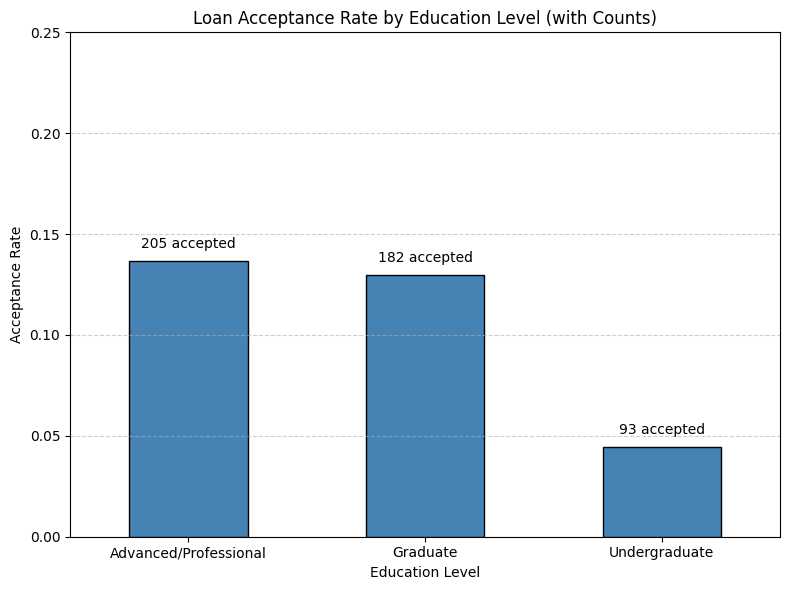

In [66]:
import matplotlib.pyplot as plt

# Calculate total customers per education level
total_by_edu = df["Education_Label"].value_counts().sort_index()

# Calculate total accepted loans per education level
accepted_by_edu = df[df["Personal_Loan"] == 1]["Education_Label"].value_counts().sort_index()

# Calculate acceptance rate
acceptance_rate_by_edu = (accepted_by_edu / total_by_edu).fillna(0)

# Plot bar chart
ax = acceptance_rate_by_edu.plot(
    kind="bar",
    color="steelblue",
    edgecolor="black",
    figsize=(8, 6)
)

# Annotate bars with absolute counts
for idx, (edu_label, rate) in enumerate(acceptance_rate_by_edu.items()):
    count = accepted_by_edu.get(edu_label, 0)
    ax.text(idx, rate + 0.005, f"{count} accepted", ha='center', va='bottom', fontsize=10)

# Chart formatting
plt.title("Loan Acceptance Rate by Education Level (with Counts)")
plt.xlabel("Education Level")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 0.25)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


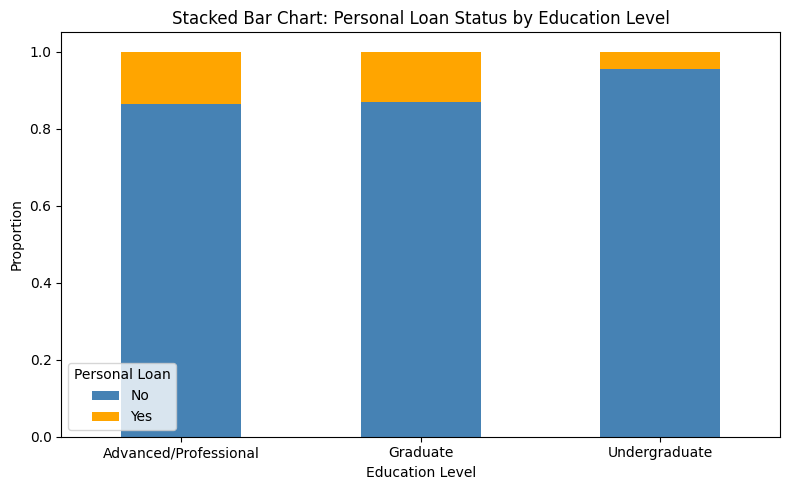

In [59]:
# Stacked Bar for Personal Loan Status by Education Level
edu_loan_dist = df.groupby(['Education_Label', 'Personal_Loan']).size().unstack().fillna(0)
edu_loan_pct = edu_loan_dist.div(edu_loan_dist.sum(axis=1), axis=0)

# Plot stacked bar
edu_loan_pct.plot(kind='bar', stacked=True, figsize=(8, 5), color=['steelblue', 'orange'])
plt.title("Stacked Bar Chart: Personal Loan Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.legend(title="Personal Loan", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


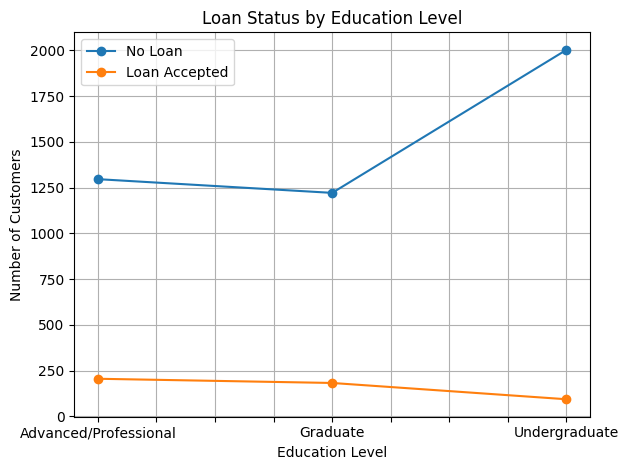

In [54]:
# Count of loan status grouped by education level
edu_loan_counts = df.groupby(['Education_Label', 'Personal_Loan']).size().unstack()

# Plot line chart
edu_loan_counts.plot(kind='line', marker='o')

# Formatting
plt.title("Loan Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(["No Loan", "Loan Accepted"])
plt.tight_layout()
plt.show()


**Answers / Observations**

Despite having the largest base, Undergraduates contribute the fewest loan acceptances.

Undergraduates have significantly lower acceptance rates (\~4.4%) compared to Graduate and Advanced/Professional customers (\~13-14%).

The majority of loan accepters are Graduate or Advanced/Professional; suggests that education is positively associated with loan uptake.

Educated customers are more likely to opt in proportionally, even if they’re fewer in count.

Targeting campaigns or tailoring offers based on education level may yield higher conversion rates.

Further segmentation (e.g., income + education) could refine targeting.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [26]:
# Function to enrich ZIP code with selected features
def enrich_zip(zipcode):
    result = search.by_zipcode(zipcode)
    if result:
        return {
            "zip_state": result.state,
            "zip_density": result.population_density,
            "zip_income": result.median_household_income
        }
    else:
        return {
            "zip_state": None,
            "zip_density": None,
            "zip_income": None
        }


In [30]:
# Loop over unique ZIP codes, apply the function once per ZIP
unique_zips = df["ZIPCode"].unique()
zip_info = {z: enrich_zip(z) for z in unique_zips}


In [31]:
# Enrich the dataframe

df["zip_state"] = df["ZIPCode"].map(lambda z: zip_info[z]["zip_state"])
df["zip_density"] = df["ZIPCode"].map(lambda z: zip_info[z]["zip_density"])
df["zip_income"] = df["ZIPCode"].map(lambda z: zip_info[z]["zip_income"])


In [32]:
# Sanity check, did the enrichment occur?

# Check: do we have enrichment results?
print("Sample enriched ZIPs:")
for z in list(zip_info.keys())[:3]:
    print(z, zip_info[z])

# Check: are the columns in df now?
print("\nDataFrame columns:", df.columns.tolist())

# Check: how many rows have ZIP income now?
print("\nRows with enriched zip_income:", df["zip_income"].notna().sum())


Sample enriched ZIPs:
91107 {'zip_state': 'CA', 'zip_density': 4008.0, 'zip_income': 80936}
90089 {'zip_state': 'CA', 'zip_density': None, 'zip_income': None}
94720 {'zip_state': 'CA', 'zip_density': None, 'zip_income': None}

DataFrame columns: ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'zip_state', 'zip_density', 'zip_income']

Rows with enriched zip_income: 3985


In [69]:
# Nulls?
df.isnull().sum()


,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [70]:
# Show rows where zip_state is missing
missing_zip_state_df = df[df['zip_state'].isna()]
missing_zip_state_df


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,zip_state,zip_density,zip_income,age_bin,Education_Label
106,107,43,17,69,92717,4,2.90,1,0,0,0,0,1,1,None,NaN,NaN,"[40, 50)",Undergraduate
172,173,38,13,171,92717,2,7.80,1,0,0,0,0,1,0,None,NaN,NaN,"[30, 40)",Undergraduate
184,185,52,26,63,92717,2,1.50,2,0,0,1,0,1,0,None,NaN,NaN,"[50, 60)",Graduate
321,322,44,20,101,92717,3,4.40,2,82,1,0,0,0,0,None,NaN,NaN,"[40, 50)",Graduate
366,367,50,24,35,92717,1,0.30,3,0,0,0,0,1,0,None,NaN,NaN,"[50, 60)",Advanced/Professional
384,385,51,25,21,93077,4,0.60,3,0,0,0,0,1,1,None,NaN,NaN,"[50, 60)",Advanced/Professional
468,469,34,10,21,92634,1,0.50,3,0,0,0,0,1,0,None,NaN,NaN,"[30, 40)",Advanced/Professional
476,477,60,34,53,92717,1,0.80,2,0,0,1,0,0,1,None,NaN,NaN,"[60, 70)",Graduate
630,631,32,7,35,96651,3,1.30,1,108,0,0,0,0,1,None,NaN,NaN,"[30, 40)",Undergraduate
672,673,51,27,23,96651,1,0.20,1,0,0,0,0,1,0,None,NaN,NaN,"[50, 60)",Undergraduate


**Observations**

I looked these Zip Codes up manually and they are indeed invalid. We will need to drop the rows missing data from out table before we run the model.

In [71]:
# Find if any unique rows exist as it pertains to missing Zip Code data

# Find rows with any missing zip-related fields
missing_zip_income_density = df[df["zip_income"].isna() | df["zip_density"].isna()]
missing_zip_state = df[df["zip_state"].isna()]

# Check for overlap: Are all missing zip_state rows in the zip_income/density group?
is_subset = set(missing_zip_state.index).issubset(set(missing_zip_income_density.index))
print("Is zip_state missing only among zip_income/density missing rows?", is_subset)

# Optionally show which ones would be unique if False
if not is_subset:
    print("Rows with zip_state missing but present in zip_income/density:")
    display(missing_zip_state.loc[~missing_zip_state.index.isin(missing_zip_income_density.index)])


Is zip_state missing only among zip_income/density missing rows? True


In [72]:
# Assessment of impacts to dataset if we drop rows with incomplete Zip Code Info
# Split the full dataset by loan status
loan_yes = df[df["Personal_Loan"] == 1]
loan_no = df[df["Personal_Loan"] == 0]

# Count of total loan yes/no
total_loan_yes = len(loan_yes)
total_loan_no = len(loan_no)

# Get the 1,015 rows with missing ZIP-related data
missing_zip_rows = df[df["zip_income"].isna() | df["zip_density"].isna()]

# Count how many of those missing rows are from each loan group
missing_loan_yes = len(missing_zip_rows[missing_zip_rows["Personal_Loan"] == 1])
missing_loan_no = len(missing_zip_rows[missing_zip_rows["Personal_Loan"] == 0])

# Calculate percentages
pct_loan_yes_dropped = missing_loan_yes / total_loan_yes * 100
pct_loan_no_dropped = missing_loan_no / total_loan_no * 100

# Remaining counts
remaining_loan_yes = total_loan_yes - missing_loan_yes
remaining_loan_no = total_loan_no - missing_loan_no

# Display results
print("=== Missing ZIP Data Impact Analysis ===")
print(f"Total rows with loans           : {total_loan_yes}")
print(f" - Missing ZIP rows (loan=1)    : {missing_loan_yes} ({pct_loan_yes_dropped:.2f}%)")
print(f" - Remaining loan rows          : {remaining_loan_yes}")
print()
print(f"Total rows without loans        : {total_loan_no}")
print(f" - Missing ZIP rows (loan=0)    : {missing_loan_no} ({pct_loan_no_dropped:.2f}%)")
print(f" - Remaining no-loan rows       : {remaining_loan_no}")
print()
print(f"TOTAL rows dropped              : {len(missing_zip_rows)}")


=== Missing ZIP Data Impact Analysis ===
Total rows with loans           : 480
 - Missing ZIP rows (loan=1)    : 110 (22.92%)
 - Remaining loan rows          : 370

Total rows without loans        : 4520
 - Missing ZIP rows (loan=0)    : 905 (20.02%)
 - Remaining no-loan rows       : 3615

TOTAL rows dropped              : 1015


**Decisions**

* We are going to keep ZIP-based features in for now and drop rows with missing data
* After training our model, if those features don't contribute meaningfully, we can go back to the full dataset and retrain without them.

* This approach will enable us to assess whether zip_income, zip_density, and zip_state are actually informative.

* If the decision tree ranks them low in importance, this will signal us that they are not worth keeping and we can go back to the pre-dropped set of data and retrain.

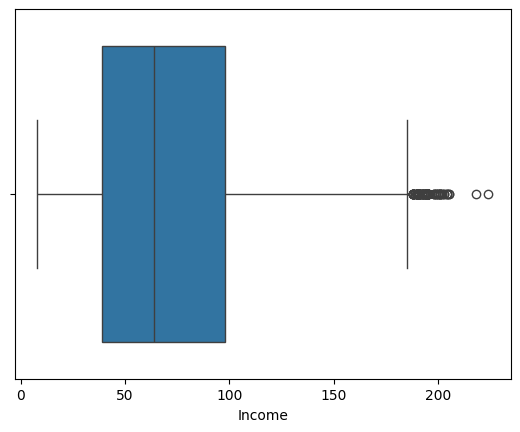

In [73]:
# Outlier detection treatment
# Visual
sns.boxplot(x=df["Income"])  # Repeat for other variables

# Statistical
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Income"] < (Q1 - 1.5 * IQR)) | (df["Income"] > (Q3 + 1.5 * IQR))]


## Model Building

### Model Evaluation Criterion

*


### Model Building

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___